In [53]:
import pickle
from HopDec import Model
from HopDec import Transitions
import pandas as pd

from HopDec.Input import getParams
from HopDec.Vectors import *
import networkx as nx
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [123]:
with open('model-checkpoint_latest.pkl', 'rb') as f:
    model = pickle.load(f)

In [124]:
for trans in model.transitionList:
    print(trans.redecoration)
    print(trans.forwardBarrier)

None
0.6708
None
0.6707
None
0.6707
None
0.6707
None
0.6707
None
0.6704


'4d60d506ffad71ca469225fd9d859657'

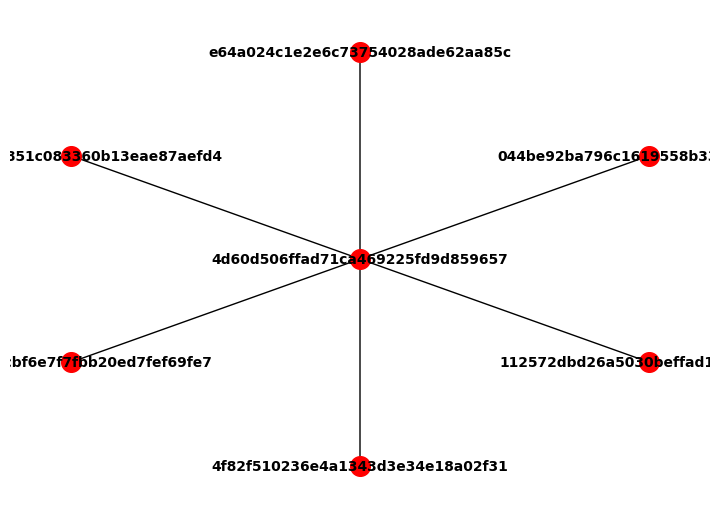

In [125]:
canonicalLabelsTrans = [ [ trans.initialState.nonCanLabel, trans.finalState.nonCanLabel  ] for trans in model.transitionList ]

G = nx.Graph()

G.add_edges_from(canonicalLabelsTrans)

pos = nx.spring_layout(G, seed=42)
# pos = nx.circular_layout(G)
pos = nx.kamada_kawai_layout(G)

plt.figure(figsize=(7,5
                    ))

nx.draw(G, pos,with_labels=True, node_color='red', node_size=200, font_size=10, font_weight='bold',width = 1)
model.initState.nonCanLabel


In [126]:
rows = []
for t,trans in enumerate(model.transitionList):
    rows.append({'trans ID' : t, 'I Can Label' : trans.initialState.nonCanLabel, 'F Can Label' : trans.finalState.nonCanLabel, 'F Bar' : trans.forwardBarrier,'dE' : trans.dE})

    
df = pd.DataFrame(rows)
df.sort_values(by=['dE','F Bar'])
    

,trans ID,I Can Label,F Can Label,F Bar,dE
2,2,4d60d506ffad71ca469225fd9d859657,786c0d5b7851c083360b13eae87aefd4,0.6707,-0.0004
0,0,4d60d506ffad71ca469225fd9d859657,044be92ba796c1619558b33f22ab5d6b,0.6708,-0.0004
5,5,4d60d506ffad71ca469225fd9d859657,112572dbd26a5030beffad13d743bcc2,0.6704,-0.0002
1,1,4d60d506ffad71ca469225fd9d859657,e64a024c1e2e6c73754028ade62aa85c,0.6707,-0.0002
3,3,4d60d506ffad71ca469225fd9d859657,5e07520ccbf6e7f7fbb20ed7fef69fe7,0.6707,-0.0001
4,4,4d60d506ffad71ca469225fd9d859657,4f82f510236e4a1343d3e34e18a02f31,0.6707,0.0000


In [ ]:
for t,trans in enumerate(model.transitionList):
    trans.exportStructure('trans',f'{t}')